In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\andy\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
target = df['koi_disposition']
target.unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(target)
encoded_y = label_encoder.transform(target)
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [9]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

Using TensorFlow backend.


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, one_hot_y, random_state=99)

In [11]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth
5136,94.381630,171.336200,0.5930,11.87000,91.2
6214,24.238242,136.616569,0.4260,4.16665,461960.0
5863,2.705816,132.537260,0.6199,6.56000,46.9
2100,8.589696,174.962500,1.1970,8.47100,245.1
3977,2.401752,133.711919,5.2500,2.08350,25044.0


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.597, difference =  0.403
k: 3, Train/Test Score: 0.744/0.595, difference =  0.149
k: 5, Train/Test Score: 0.677/0.578, difference =  0.098
k: 7, Train/Test Score: 0.644/0.572, difference =  0.072
k: 9, Train/Test Score: 0.622/0.565, difference =  0.057
k: 11, Train/Test Score: 0.606/0.564, difference =  0.042
k: 13, Train/Test Score: 0.595/0.554, difference =  0.040
k: 15, Train/Test Score: 0.578/0.542, difference =  0.036
k: 17, Train/Test Score: 0.569/0.536, difference =  0.033
k: 19, Train/Test Score: 0.561/0.535, difference =  0.025
k: 21, Train/Test Score: 0.554/0.529, difference =  0.025
k: 23, Train/Test Score: 0.548/0.530, difference =  0.019
k: 25, Train/Test Score: 0.541/0.517, difference =  0.025


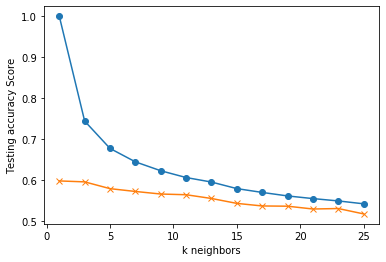

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 26, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train_minmax)
    train_score = knn.score(X_train_minmax, y_train_minmax)
    test_score = knn.score(X_test_minmax, y_test_minmax)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}, difference = {train_score-test_score: .3f}")
    
    
plt.plot(range(1, 26, 2), train_scores, marker='o')
plt.plot(range(1, 26, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_minmax, y_train_minmax)
print('k=19 Test Acc: %.3f' % knn.score(X_test_minmax, y_test_minmax))

print(f"Training Data Score: {knn.score(X_train_minmax, y_train_minmax)}")
print(f"Testing Data Score: {knn.score(X_test_minmax, y_test_minmax)}")

k=19 Test Acc: 0.535
Training Data Score: 0.5605569330535952
Testing Data Score: 0.5354691075514875


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [23]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [24]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'leaf_size': [10, 30, 50],
             'p': [1,2,3]}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [25]:
# Train the model with GridSearch
grid.fit(X_train_minmax, y_train_minmax)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] leaf_size=10, p=1 ...............................................
[CV] ................... leaf_size=10, p=1, score=0.526, total=   0.1s
[CV] leaf_size=10, p=1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................... leaf_size=10, p=1, score=0.504, total=   0.2s
[CV] leaf_size=10, p=1 ...............................................
[CV] ................... leaf_size=10, p=1, score=0.530, total=   0.1s
[CV] leaf_size=10, p=1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................... leaf_size=10, p=1, score=0.521, total=   0.1s
[CV] leaf_size=10, p=1 ...............................................
[CV] ................... leaf_size=10, p=1, score=0.534, total=   0.2s
[CV] leaf_size=10, p=2 ...............................................
[CV] ................... leaf_size=10, p=2, score=0.517, total=   0.2s
[CV] leaf_size=10, p=2 ...............................................
[CV] ................... leaf_size=10, p=2, score=0.499, total=   0.2s
[CV] leaf_size=10, p=2 ...............................................
[CV] ................... leaf_size=10, p=2, score=0.528, total=   0.2s
[CV] leaf_size=10, p=2 ...............................................
[CV] ................... leaf_size=10, p=2, score=0.520, total=   0.2s
[CV] leaf_size=10, p=2 ...............................................
[CV] ................... leaf_size=10, p=2, score=0.531, total=   0.2s
[CV] leaf_size=10, p=3 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    9.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=19, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 30, 50], 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [26]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 10, 'p': 1}
0.5231754706408867


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'andy_spatz.sav'
knn_model = grid
joblib.dump(knn_model, filename)